In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import TweetTokenizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#read two files,where train data and test data.
x=pd.read_csv('/content/SMS_train (1).csv',encoding='ISO-8859-1')
y=pd.read_csv('/content/SMS_test (2).csv',encoding='ISO-8859-1')
x
y

,S. No.,Message_body,Label
0,1,"UpgrdCentre Orange customer, you may now claim...",Spam
1,2,"Loan for any purpose £500 - £75,000. Homeowner...",Spam
2,3,Congrats! Nokia 3650 video camera phone is you...,Spam
3,4,URGENT! Your Mobile number has been awarded wi...,Spam
4,5,Someone has contacted our dating service and e...,Spam
...,...,...,...
120,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
121,122,Try to do something dear. You read something f...,Non-Spam
122,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
123,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
#combine the test data and train data.
df=pd.concat([x,y],ignore_index=True)
df

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...,...
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
df.head()

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam


In [ ]:
df.tail()

,S. No.,Message_body,Label
1077,121,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,122,Try to do something dear. You read something f...,Non-Spam
1079,123,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,124,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam
1081,125,Great. Have a safe trip. Dont panic surrender ...,Non-Spam


In [ ]:
df.describe()

,S. No.
count,1082.000000
mean,430.940850
std,292.259931
min,1.000000
25%,146.250000
50%,416.500000
75%,686.750000
max,957.000000


In [ ]:
df.columns

Index(['S. No.', 'Message_body', 'Label'], dtype='object')

In [ ]:
df["Label"].value_counts()

,count
Label,
Non-Spam,884
Spam,198


In [ ]:
# Check and drop missing values
df.dropna(inplace=True)


In [ ]:
df.drop(["S. No."],axis=1,inplace=True)
df

,Message_body,Label
0,Rofl. Its true to its name,Non-Spam
1,The guy did some bitching but I acted like i'd...,Non-Spam
2,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,Will ü b going to esplanade fr home?,Non-Spam
4,This is the 2nd time we have tried 2 contact u...,Spam
...,...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...,Non-Spam
1078,Try to do something dear. You read something f...,Non-Spam
1079,Sun ah... Thk mayb can if dun have anythin on....,Non-Spam
1080,"SYMPTOMS when U are in love: ""1.U like listeni...",Non-Spam


In [ ]:
sms=df.Message_body
sms

,Message_body
0,Rofl. Its true to its name
1,The guy did some bitching but I acted like i'd...
2,"Pity, * was in mood for that. So...any other s..."
3,Will ü b going to esplanade fr home?
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear. You read something f...
1079,Sun ah... Thk mayb can if dun have anythin on....
1080,"SYMPTOMS when U are in love: ""1.U like listeni..."


In [ ]:
# performing tokenization on your text data using the TweetTokenizer from NLTK.
# It breaks down raw text into smaller, manageable units
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
sms=sms.apply(lambda x:tk.tokenize(x)).apply(lambda x:" ".join(x))
sms

,Message_body
0,Rofl . Its true to its name
1,The guy did some bitching but I acted like i'd...
2,"Pity , * was in mood for that . So ... any oth..."
3,Will ü b going to esplanade fr home ?
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear . You read something ...
1079,Sun ah ... Thk mayb can if dun have anythin on...
1080,"SYMPTOMS when U are in love : "" 1 . U like lis..."


In [ ]:
# designed to clean your text data by removing any characters
# that are not letters or numbers and replacing them with spaces.
sms=sms.apply(lambda x:re.sub('[^a-zA-Z0-9]+'," ",x))
sms

,Message_body
0,Rofl Its true to its name
1,The guy did some bitching but I acted like i d...
2,Pity was in mood for that So any other suggest...
3,Will b going to esplanade fr home
4,This is the 2nd time we have tried 2 contact u...
...,...
1077,7 wonders in My WORLD 7th You 6th Ur style 5th...
1078,Try to do something dear You read something fo...
1079,Sun ah Thk mayb can if dun have anythin on Thk...
1080,SYMPTOMS when U are in love 1 U like listening...


In [ ]:
# helps to reduce different forms of a word to a common base form.
# This is useful because words like "run", "running", and "ran" have similar meanings
# in many contexts By stemming them, you reduce the number of unique words in your vocabulary,
#which can help improve the performance of text-based models.
from nltk.stem import SnowballStemmer
ss=SnowballStemmer("english")
sms=sms.apply(lambda x:[ss.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:" ".join(x))
sms

,Message_body
0,rofl it true to it name
1,the guy did some bitch but i act like i d be i...
2,piti was in mood for that so ani other suggest
3,will b go to esplanad fr home
4,this is the 2nd time we have tri 2 contact u u...
...,...
1077,7 wonder in my world 7th you 6th ur style 5th ...
1078,tri to do someth dear you read someth for exam
1079,sun ah thk mayb can if dun have anythin on thk...
1080,symptom when u are in love 1 u like listen son...


In [ ]:
# to removing stopwords from your text data.
# it reduces the overall number of tokens in your dataset,
# which can make subsequent processing steps (like vectorization)
from nltk.corpus import stopwords
stop=stopwords.words('english')
sms=sms.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:" ".join(x))
sms

,Message_body
0,rofl true name
1,guy bitch act like interest buy someth els nex...
2,piti mood ani suggest
3,b go esplanad fr home
4,2nd time tri 2 contact u u 750 pound prize 2 c...
...,...
1077,7 wonder world 7th 6th ur style 5th ur smile 4...
1078,tri someth dear read someth exam
1079,sun ah thk mayb dun anythin thk book e lesson ...
1080,symptom u love 1 u like listen song 2 u get st...


In [ ]:
# The TfidfVectorizer converts your text data into a numerical representation (the TF-IDF matrix)
# that your SVM model can understand and process.
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(sms)
train_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9599 stored elements and shape (1082, 2997)>

In [ ]:
print(train_data)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9599 stored elements and shape (1082, 2997)>
  Coords	Values
  (0, 2257)	0.6743246681420616
  (0, 2727)	0.5352804139572925
  (0, 1849)	0.5086856793431558
  (1, 1307)	0.2588858462402129
  (1, 607)	0.36211655551990307
  (1, 396)	0.3419878575694143
  (1, 1623)	0.20980773882403927
  (1, 1475)	0.307577621142851
  (1, 677)	0.26551480891862445
  (1, 2448)	0.26551480891862445
  (1, 1034)	0.29329608266677626
  (1, 1878)	0.25587622919424974
  (1, 2873)	0.22002695063463382
  (1, 1234)	0.3166286972359124
  (1, 2787)	0.2620897628588603
  (1, 1189)	0.19084717659108363
  (2, 2038)	0.5469696796701571
  (2, 1802)	0.5469696796701571
  (2, 463)	0.36716239650585775
  (2, 2548)	0.5165656915002457
  (3, 1263)	0.3106896135077222
  (3, 1062)	0.5956800313099778
  (3, 1185)	0.6307405258859952
  (3, 1384)	0.38833446069338773
  (4, 197)	0.2540705792794886
  :	:
  (1079, 1611)	0.2410408066920934
  (1079, 2553)	0.2544650331411059
  (1079, 1819)	0.2633677

In [ ]:
y=df['Label'].values
y

array(['Non-Spam', 'Non-Spam', 'Non-Spam', ..., 'Non-Spam', 'Non-Spam',
       'Non-Spam'], dtype=object)

In [ ]:
# seperating features
x=train_data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6772 stored elements and shape (757, 2997)>

In [ ]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam',
       'Non-Spam', 'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Spam',

In [ ]:
y_test

array(['Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Spam', 'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam',
       'Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam', 'Spam',
       'Non-Spam', 'Non-Spam', 'Spam', 'Non-Spam', 'Non-Spam', 'Non-Spam',
       'Spam', 'Spam',

In [ ]:
pd.Series(y_test).value_counts()

,count
Non-Spam,269
Spam,56


In [ ]:
#evaluating the performance
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
result=confusion_matrix(y_test,y_pred)
result

array([[269,   0],
       [ 22,  34]])

In [ ]:
score=accuracy_score(y_test,y_pred)
score

0.9323076923076923

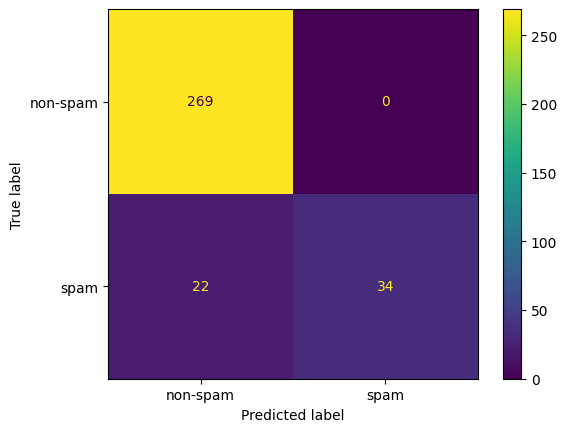

In [ ]:
cm=["non-spam",'spam']
cmd=ConfusionMatrixDisplay(confusion_matrix=result,display_labels=cm)
cmd.plot()